# Customer Segmentation According to Monthly Internet Usage


Clustering helps marketers develop customer base, target areas, and segment customers based on purchasing history, interests, or activity tracking. Customer classification helps the company target specific customer clusters for specific campaigns.


Within the scope of the project, the usage and monthly payments of prepaid subscribers in a Telco operator in Asia were examined and the subscriptions and subscriptions were grouped according to usage and upload generation.


Kmeans and Agglomerative Clustering were used within the scope of the project. As a result of the analysis, Kmeans was tested with n=3 and n=6 subgroups. Agglomerative Clustering was tried with n = 5 subgroups.


## 1. Importing Required Libraries and Datasets


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report

from pyod.models.ecod import ECOD
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.decomposition import PCA
import plotly.express as px

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

In [3]:
df_app=pd.read_excel('data/Prepaid_User_Digital_Usage.xlsx', sheet_name='App')
df_app.columns = [col.lower().replace(' ', '_') for col in df_app.columns]
df_app['subs_id']=df_app['subs_id'].astype(str)
df_app

,subs_id,total_data_mb,other_app_(mb),facebook_login_(day_count),twitter_login__(day_count),instagram_login_(day_count),youtube_login_(day_count),whatsapp_login_(day_count),facebook_monthly_data_mb,twitter_monthly_data_mb,instagram_monthly_data_mb,youtube_monthly_data_mb,whatsapp_monthly_data_mb,facebook_monthly_upload_mb,twitter_monthly_upload_mb,instagram_monthly_upload_mb,youtube_monthly_upload_mb,whatsapp_monthly_upload_mb
0,1,13856.153735,7246.828899,16.666667,16.67,16.666667,12.50,16.666667,789.016061,193.360994,5257.455167,134.146450,44.362428,51.971356,21.751368,90.262799,24.754088,2.244124
1,2,2948.817809,1181.695721,10.333333,6.67,10.333333,7.75,10.333333,15.220190,31.691092,831.278365,622.419072,201.115561,3.300267,2.292495,17.055627,20.982526,21.766894
2,3,1437.422681,1155.265796,16.666667,5.00,1.000000,12.50,16.666667,17.399376,0.957409,0.004133,177.581172,52.625448,2.016264,0.069636,0.001109,21.255877,10.246462
3,4,19114.908319,15569.682465,16.333333,16.33,7.666667,12.25,16.333333,2506.548493,117.575893,10.824614,534.123880,227.157988,72.861936,9.579258,0.639528,35.440062,30.474202
4,5,2148.035502,1743.787571,12.666667,1.00,10.333333,9.50,12.666667,20.654694,0.066194,284.874511,41.841041,27.942655,3.481078,0.014303,7.247354,10.977073,7.149027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,802.934744,623.550967,7.666667,1.33,6.666667,4.25,7.666667,41.494195,0.070357,81.256596,45.644383,1.563502,3.980930,0.005927,1.306298,2.931196,1.130392
188,189,299.598990,218.000385,7.333333,1.67,0.000000,9.75,12.000000,5.444642,3.955019,0.000000,63.606002,2.747286,0.882093,0.286354,0.000000,4.001744,0.675465
189,190,830.904331,49.844612,16.333333,0.00,0.000000,12.50,16.333333,449.586198,0.000000,0.000000,237.851401,43.884456,23.372065,0.000000,0.000000,22.425258,3.940341
190,191,6040.091387,3149.172845,5.000000,6.00,3.000000,10.75,16.666667,1.612835,7.494277,144.644838,2588.927422,101.564451,0.078578,0.581203,1.872095,34.069496,10.073348


In [4]:
df_app.columns

Index(['subs_id', 'total_data_mb', 'other_app_(mb)',
       'facebook_login_(day_count)', 'twitter_login__(day_count)',
       'instagram_login_(day_count)', 'youtube_login_(day_count)',
       'whatsapp_login_(day_count)', 'facebook_monthly_data_mb',
       'twitter_monthly_data_mb', 'instagram_monthly_data_mb',
       'youtube_monthly_data_mb', 'whatsapp_monthly_data_mb',
       'facebook_monthly_upload_mb', 'twitter_monthly_upload_mb',
       'instagram_monthly_upload_mb', 'youtube_monthly_upload_mb',
       'whatsapp_monthly_upload_mb'],
      dtype='object')

In [6]:
df_app.describe()

,total_data_mb,other_app_(mb),facebook_login_(day_count),twitter_login__(day_count),instagram_login_(day_count),youtube_login_(day_count),whatsapp_login_(day_count),facebook_monthly_data_mb,twitter_monthly_data_mb,instagram_monthly_data_mb,youtube_monthly_data_mb,whatsapp_monthly_data_mb,facebook_monthly_upload_mb,twitter_monthly_upload_mb,instagram_monthly_upload_mb,youtube_monthly_upload_mb,whatsapp_monthly_upload_mb
count,192.000000,192.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,7124.351177,4395.581015,11.469697,4.305508,7.897504,9.504902,12.218360,611.255142,58.509618,1362.462928,513.726766,122.828924,29.973702,2.402168,38.549952,44.825410,17.197321
std,9985.506494,6879.997435,5.368080,4.678380,6.243160,3.556173,5.137884,995.449617,225.357417,2953.495366,871.690345,212.774101,54.156157,10.739836,93.992553,115.355615,33.032590
min,2.021759,1.694982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1310.289139,490.095620,7.500000,1.000000,1.500000,7.250000,9.333333,8.252841,0.055908,0.936525,58.349933,14.547570,1.271453,0.008456,0.072677,6.774347,1.427022
50%,3999.377387,1868.257600,13.333333,2.330000,7.333333,11.000000,14.666667,81.469473,0.586922,145.224080,216.948680,60.578429,7.812552,0.059472,6.000277,21.255877,6.290219
75%,8974.108224,5015.902928,16.166667,6.585000,14.166667,12.250000,16.333333,842.974709,13.120723,1187.662658,529.817775,136.304064,40.473887,0.950556,32.826543,38.740234,16.846047
max,65024.311397,49437.677383,17.333333,17.000000,17.000000,14.333333,17.333333,4722.995334,2143.923460,22489.358720,5464.319360,1691.607065,510.265205,129.501750,843.629208,1375.612789,312.037931


In [10]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subs_id                      192 non-null    object 
 1   total_data_mb                192 non-null    float64
 2   other_app_(mb)               192 non-null    float64
 3   facebook_login_(day_count)   187 non-null    float64
 4   twitter_login__(day_count)   187 non-null    float64
 5   instagram_login_(day_count)  187 non-null    float64
 6   youtube_login_(day_count)    187 non-null    float64
 7   whatsapp_login_(day_count)   187 non-null    float64
 8   facebook_monthly_data_mb     187 non-null    float64
 9   twitter_monthly_data_mb      187 non-null    float64
 10  instagram_monthly_data_mb    187 non-null    float64
 11  youtube_monthly_data_mb      187 non-null    float64
 12  whatsapp_monthly_data_mb     187 non-null    float64
 13  facebook_monthly_upl

In [6]:
df_reload=pd.read_excel('data/Prepaid_User_Digital_Usage.xlsx', sheet_name='Reload')

In [7]:
df_reload.columns

Index(['Subs ID', 'Reload Date', 'Reload ($)'], dtype='object')

In [8]:
df_reload.describe()

,Subs ID,Reload Date,Reload ($)
count,622.000000,6.220000e+02,622.000000
mean,97.374598,2.023063e+07,152.717042
std,55.495858,8.399211e+01,922.977053
min,1.000000,2.023051e+07,-90.000000
25%,50.250000,2.023053e+07,80.000000
50%,97.000000,2.023062e+07,100.000000
75%,146.000000,2.023071e+07,135.000000
max,192.000000,2.023080e+07,23100.000000


In [11]:
df_reload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Subs ID      622 non-null    int64
 1   Reload Date  622 non-null    int64
 2   Reload ($)   622 non-null    int64
dtypes: int64(3)
memory usage: 14.7 KB


## 2. Data Preprocessing

In this step, the data is brought into a processable format. The df_load dataframe, which contains monthly uploads, has been rearranged historically for each user, and df_monthly_reload, which contains user-based total monthly uploads, has been created.
Adjustments were also made for outliers. Due to the low number of users uploading in the 8th month, this month was excluded from the data, and the data of users who uploaded the amount of - was arranged by taking its absolute value.


In the df_app dataframe, social media totals were taken and columns for users' monthly total number of logins, data usage and monthly upload amount were created. New columns containing monthly ratios were created using these totals for each social media environment.
Finally, the df_monthly_reload datafrequency, which contains the users' monthly recharge amounts, has been merged into the df_app dataframe.


In [12]:
df_reload.dtypes

Subs ID        int64
Reload Date    int64
Reload ($)     int64
dtype: object

In [13]:
# Converting Reload Date column to datetime format
df_reload['Reload Date'] = pd.to_datetime(df_reload['Reload Date'], format='%Y%m%d')

# Add Year, Month and Day columns
df_reload['Year'] = df_reload['Reload Date'].dt.year
df_reload['Month'] = df_reload['Reload Date'].dt.month
df_reload['Day'] = df_reload['Reload Date'].dt.day
df_reload.columns = [col.lower().replace(' ', '_') for col in df_reload.columns]


In [14]:
df_reload.groupby('month').size()

month
5    174
6    210
7    220
8     18
dtype: int64

There is not enough observation data for the 8th month. This month may mislead the model, so reload data for the 8th month will not be included in the project scope.


In [15]:
df_reload = df_reload[df_reload['month'] != 8]

In [16]:
df_reload.loc[df_reload['reload_($)'] < 0, 'reload_($)']

31   -90
Name: reload_($), dtype: int64

Since the loading amount cannot be less than 0, taking the absolute value of values ​​less than 0:


In [17]:
df_reload.loc[df_reload['reload_($)'] < 0, 'reload_($)'] = df_reload.loc[df_reload['reload_($)'] < 0, 'reload_($)'].abs()


In [18]:
# create df_reload_monthly: grouping by Year and Month
df_reload_monthly = df_reload.groupby(['subs_id', 'year', 'month']).agg(
    Reload_Count=('reload_date', 'count'),
    Total_Reload_Amount=('reload_($)', 'sum')
).reset_index()
df_reload_monthly.sort_values(by=['subs_id','year','month'],inplace=True)
df_reload_monthly['subs_id']=df_reload_monthly['subs_id'].astype(str)
df_reload_monthly.columns = [col.lower().replace(' ', '_') for col in df_reload_monthly.columns]
df_reload_monthly

,subs_id,year,month,reload_count,total_reload_amount
0,1,2023,5,1,100
1,1,2023,6,1,102
2,1,2023,7,3,125
3,2,2023,5,2,200
4,2,2023,6,1,100
...,...,...,...,...,...
479,191,2023,6,1,175
480,191,2023,7,1,150
481,192,2023,5,1,120
482,192,2023,6,1,120


In [19]:
df_reload_monthly.groupby('month').size()

month
5    146
6    168
7    170
dtype: int64

In [20]:
df_reload_monthly.describe()

,year,month,reload_count,total_reload_amount
count,484.0,484.000000,484.000000,484.000000
mean,2023.0,6.049587,1.247934,192.037190
std,0.0,0.807329,0.565114,1047.245634
min,2023.0,5.000000,1.000000,60.000000
25%,2023.0,5.000000,1.000000,100.000000
50%,2023.0,6.000000,1.000000,120.000000
75%,2023.0,7.000000,1.000000,160.000000
max,2023.0,7.000000,4.000000,23100.000000


In [21]:
months = df_reload_monthly['month'].unique()

# creating new columns for each month
for month in months:
    df_reload_monthly[f'month_{month}_reload_count'] = df_reload_monthly.apply(
        lambda row: row['reload_count'] if row['month'] == month else 0, axis=1
    )
    df_reload_monthly[f'month_{month}_total_reload_amount'] = df_reload_monthly.apply(
        lambda row: row['total_reload_amount'] if row['month'] == month else 0, axis=1
    )

# Rearrange data by grouping and aggregating by 'subs_id' and month
df_loads = df_reload_monthly.groupby('subs_id').agg({
    **{f'month_{month}_reload_count': 'sum' for month in months},
    **{f'month_{month}_total_reload_amount': 'sum' for month in months}
}).reset_index()

In [22]:
#generating total usage columns, sum of all social media platforms
df_app['total_monthly_upload_mb'] = (
    df_app['facebook_monthly_upload_mb'] +
    df_app['twitter_monthly_upload_mb'] +
    df_app['instagram_monthly_upload_mb'] +
    df_app['youtube_monthly_upload_mb'] +
    df_app['whatsapp_monthly_upload_mb']
)

df_app['total_monthly_data_mb'] = (
    df_app['facebook_monthly_data_mb'] +
    df_app['twitter_monthly_data_mb'] +
    df_app['instagram_monthly_data_mb'] +
    df_app['youtube_monthly_data_mb'] +
    df_app['whatsapp_monthly_data_mb']
)

df_app['total_day_count'] = (
    df_app['facebook_login_(day_count)'] +
    df_app['twitter_login__(day_count)'] +
    df_app['instagram_login_(day_count)'] +
    df_app['youtube_login_(day_count)'] +
    df_app['whatsapp_login_(day_count)']
)

In [23]:
# facebook usage ratios
df_app['facebook_day_ratio'] = df_app['facebook_login_(day_count)'] / df_app['total_day_count']
df_app['facebook_upload_ratio'] = df_app['facebook_monthly_upload_mb'] / df_app['total_monthly_upload_mb']
df_app['facebook_data_ratio'] = df_app['facebook_monthly_data_mb'] / df_app['total_monthly_data_mb']


In [24]:
# twitter usage ratios
df_app['twitter_day_ratio'] = df_app['twitter_login__(day_count)'] / df_app['total_day_count']
df_app['twitter_upload_ratio'] = df_app['twitter_monthly_upload_mb'] / df_app['total_monthly_upload_mb']
df_app['twitter_data_ratio'] = df_app['twitter_monthly_data_mb'] / df_app['total_monthly_data_mb']

#instagram usage ratios
df_app['instagram_day_ratio'] = df_app['instagram_login_(day_count)'] / df_app['total_day_count']
df_app['instagram_upload_ratio'] = df_app['instagram_monthly_upload_mb'] / df_app['total_monthly_upload_mb']
df_app['instagram_data_ratio'] = df_app['instagram_monthly_data_mb'] / df_app['total_monthly_data_mb']

#youtube usage ratios
df_app['youtube_day_ratio'] = df_app['youtube_login_(day_count)'] / df_app['total_day_count']
df_app['youtube_upload_ratio'] = df_app['youtube_monthly_upload_mb'] / df_app['total_monthly_upload_mb']
df_app['youtube_data_ratio'] = df_app['youtube_monthly_data_mb'] / df_app['total_monthly_data_mb']

#whatsapp usage ratios
df_app['whatsapp_day_ratio'] = df_app['whatsapp_login_(day_count)'] / df_app['total_day_count']
df_app['whatsapp_upload_ratio'] = df_app['whatsapp_monthly_upload_mb'] / df_app['total_monthly_upload_mb']
df_app['whatsapp_data_ratio'] = df_app['whatsapp_monthly_data_mb'] / df_app['total_monthly_data_mb']




In [25]:
#merging dataframes
df = pd.merge(df_app, df_loads, on='subs_id')
df

,subs_id,total_data_mb,other_app_(mb),facebook_login_(day_count),twitter_login__(day_count),instagram_login_(day_count),youtube_login_(day_count),whatsapp_login_(day_count),facebook_monthly_data_mb,twitter_monthly_data_mb,...,youtube_data_ratio,whatsapp_day_ratio,whatsapp_upload_ratio,whatsapp_data_ratio,month_5_reload_count,month_6_reload_count,month_7_reload_count,month_5_total_reload_amount,month_6_total_reload_amount,month_7_total_reload_amount
0,1,13856.153735,7246.828899,16.666667,16.67,16.666667,12.50,16.666667,789.016061,193.360994,...,0.020900,0.210517,0.011750,0.006912,1,1,3,100,102,125
1,2,2948.817809,1181.695721,10.333333,6.67,10.333333,7.75,10.333333,15.220190,31.691092,...,0.365758,0.227506,0.332838,0.118183,2,1,1,200,100,100
2,3,1437.422681,1155.265796,16.666667,5.00,1.000000,12.50,16.666667,17.399376,0.957409,...,0.714418,0.321543,0.305051,0.211715,1,1,1,78,78,78
3,4,19114.908319,15569.682465,16.333333,16.33,7.666667,12.25,16.333333,2506.548493,117.575893,...,0.157270,0.237013,0.204532,0.066885,1,1,2,76,88,232
4,5,2148.035502,1743.787571,12.666667,1.00,10.333333,9.50,12.666667,20.654694,0.066194,...,0.111463,0.274368,0.247638,0.074438,1,1,1,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,802.934744,623.550967,7.666667,1.33,6.666667,4.25,7.666667,41.494195,0.070357,...,0.268451,0.277979,0.120836,0.009195,0,1,0,0,100,0
188,189,299.598990,218.000385,7.333333,1.67,0.000000,9.75,12.000000,5.444642,3.955019,...,0.839651,0.390202,0.115550,0.036266,1,1,1,78,78,78
189,190,830.904331,49.844612,16.333333,0.00,0.000000,12.50,16.333333,449.586198,0.000000,...,0.325235,0.361624,0.079222,0.060007,1,1,1,75,78,100
190,191,6040.091387,3149.172845,5.000000,6.00,3.000000,10.75,16.666667,1.612835,7.494277,...,0.910234,0.402414,0.215820,0.035709,1,1,1,150,175,150


In [26]:
#looking for nan values in df
df[df.isna().any(axis=1)]

,subs_id,total_data_mb,other_app_(mb),facebook_login_(day_count),twitter_login__(day_count),instagram_login_(day_count),youtube_login_(day_count),whatsapp_login_(day_count),facebook_monthly_data_mb,twitter_monthly_data_mb,...,youtube_data_ratio,whatsapp_day_ratio,whatsapp_upload_ratio,whatsapp_data_ratio,month_5_reload_count,month_6_reload_count,month_7_reload_count,month_5_total_reload_amount,month_6_total_reload_amount,month_7_total_reload_amount
22,23,820.0,820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,0,0,100,0
42,43,1091.0,1091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,1,150,125,125
66,67,318.0,318.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,2,2,0,120,138
99,100,3601.0,3601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,1,78,78,78
121,122,2972.0,2972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,1,0,100,100
137,138,2874.0,2874.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,1,100,100,100
185,186,3244.0,3244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,0,1,0,0,285


In [27]:
#drop nan values:
df=df.dropna()
df.reset_index(drop=True,inplace=True)

## 3. Data Scalization

Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

In [28]:
def scalaed_data(self, columns):
        """Preprocess the data by scaling the specified columns.
        Args:
            columns: columns to be scalized
            
        Return:
            df (dataframe)
            
        """
        
        self.df[columns] = self.scaler.fit_transform(self.df[columns])
        return self.df

In [29]:
# 1. Selecting relevant features for segmentation
features = [
    'total_data_mb', 'facebook_login_(day_count)', 'twitter_login__(day_count)',
    'instagram_login_(day_count)', 'youtube_login_(day_count)', 'whatsapp_login_(day_count)',
    'facebook_monthly_data_mb', 'twitter_monthly_data_mb', 'instagram_monthly_data_mb',
    'youtube_monthly_data_mb', 'whatsapp_monthly_data_mb', 'month_5_reload_count',
    'month_6_reload_count', 'month_7_reload_count'
]

# 2. data scalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])


## 4. KMeans Clustering

K-means clustering is a machine learning algorithm used for unsupervised learning. It is a method of clustering data into a predefined number of clusters (n_subgroups) based on the similarity of data points of the algorithm without any limitation.


### 4.1 Getting the Optimal Number of Clusters

The choice of K requires a balance between the simplicity and interpretability of a smaller number of clusters and the richness of capturing underlying structures with a larger number of clusters. An inappropriate choice of K can lead to oversimplifying or overcomplicating clustering results, making them less useful for meaningful insights. Various techniques have been used over time to solve this problem. In this project, we will use two method.


###  4.1.1 Elbow Method

The Elbow Method is a widely used technique to select the optimal number of clusters (K) in K-means clustering. It helps determine the K value at which the within-cluster sum of squares (WCSS) shows a significant decrease and creates an elbow-like shape in the graph. The x value on the graph that reaches the point where the slope begins to decrease sharply gives the subgroup value to be used in the cluster.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

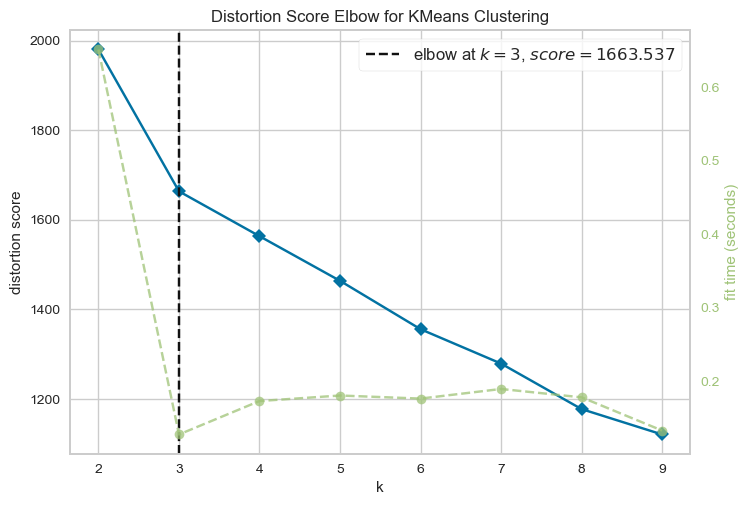

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show()       

##### It is observed in the graph that the slope suddenly decreases at point n = 3. The graph obtained from the Elbow method shows that it can be divided into 3 clusters.


### 4.1.2 Silhouette Skor

Silhouette Analysis is a methodology that quantitatively measures how well each data point fits into its assigned cluster compared to neighboring clusters. It provides a silhouette score ranging from -1 to 1 for each data point, representing the quality of the clustering solution. A higher silhouette score indicates that a data point matches well with its own cluster, while a lower score indicates that it may belong to a different cluster. Silhouette Analysis allows us to evaluate the clustering structure and choose the K value that maximizes the average silhouette score.


In [31]:
def silhouette_score_kmeans(X, n_clusters):
    """
    Calculate and print the silhouette score for KMeans clustering.

    Parameters:
    - X: DataFrame or numpy array of features.
    - n_clusters: Number of clusters to form.

    Returns:
    - silhouette_avg: The average silhouette score.
    """
    # Initialize the KMeans model
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, n_init=10, init='k-means++', random_state=10)
    
    # Fit the model and predict cluster labels
    cluster_labels = clusterer.fit_predict(X)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Print the silhouette score
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.4f}")
    
    return silhouette_avg

In [ ]:
start,end= (2,10)
for n_clusters in range(start, end + 1):
    # Calculate silhouette score for KMeans
    kmeans_score = silhouette_score_kmeans(df_scaled, n_clusters)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, the average silhouette_score is: 0.2230


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, the average silhouette_score is: 0.2457


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, the average silhouette_score is: 0.1561


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### It is clear that n=3 and n=6 scores have the highest silhouette score. We will try k means clustering for these two subgroups.


In [ ]:
def perform_kmeans(df1,df2, n_clusters):
    """Perform KMeans clustering and add the cluster labels to the DataFrame.
    Args: 
        df1 (pd.DataFrame): original df
        df2 (pd.DataFrame): scaled df for clustering
        n_cluster (int): k means cluster number
        
    Returns:
         df1['Segment_KMeans_'+str(n_clusters)']  """
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df1['Segment_KMeans_'+str(n_clusters)] = kmeans.fit_predict(df2)
    return kmeans

In [ ]:
def analyze_segments_mean(df, columns,algorithm, n_clusters):
    """Analyze and profile the segments by calculating mean statistics and counts.
    
    Args:
        df (pd.DataFrame): DataFrame with segment labels and features.
        columns (list): List of columns to analyze.
        algorithm (str): Algorithm name to find column in df
        n_clusters (int): Cluster number
        
    Returns:
        pd.DataFrame: DataFrame with mean statistics and counts for each segment.
    """
    pd.set_option('display.max_columns', None)
    
    if  algorithm=='AgglomerativeClustering':
         segment_col='Segment_'+str(algorithm)
    else:        
        segment_col='Segment_'+str(algorithm)+'_'+str(n_clusters)

    # Include the segment column in the analysis
    columns_with_segment = columns + [segment_col]
    
    # Analyzing and profiling the segments
    segment_summary_mean = df[columns_with_segment].groupby(segment_col).mean()
    
    # Combine the summary statistics and the counts into one DataFrame
    segment_summary_mean['Count'] = df[segment_col].value_counts().rename('Count')
    
    return segment_summary_mean

In [ ]:
def analyze_segments_std(df, columns, algorithm, n_clusters):
    """Analyze and profile the segments by calculating mean statistics and counts.
    
    Args:
        df (pd.DataFrame): DataFrame with segment labels and features.
        columns (list): List of columns to analyze.
        algorithm (str): Algorithm name to find column in df
        n_cluster (int): Cluster number
        
    Returns:
        pd.DataFrame: DataFrame with mean statistics and counts for each segment.
    """
    pd.set_option('display.max_columns', None)
    
    if  algorithm=='AgglomerativeClustering':
         segment_col='Segment_'+str(algorithm)
    else:        
        segment_col='Segment_'+str(algorithm)+'_'+str(n_clusters)
    
    # Include the segment column in the analysis
    columns_with_segment = columns + [segment_col]
    
    # Analyzing and profiling the segments
    segment_summary_std = df[columns_with_segment].groupby(segment_col).std()

    # Combine the summary statistics and the counts into one DataFrame
    segment_summary_std['Count'] = df[segment_col].value_counts().rename('Count')
    
    return segment_summary_std

#### KMeans with 3 subgroup

In [ ]:
perform_kmeans(df,df_scaled,3)

In [ ]:
columns=['total_data_mb', 'other_app_(mb)',
       'facebook_login_(day_count)', 'twitter_login__(day_count)',
       'instagram_login_(day_count)', 'youtube_login_(day_count)',
       'whatsapp_login_(day_count)', 'facebook_monthly_data_mb',
       'twitter_monthly_data_mb', 'instagram_monthly_data_mb',
       'youtube_monthly_data_mb', 'whatsapp_monthly_data_mb',
       'facebook_monthly_upload_mb', 'twitter_monthly_upload_mb',
       'instagram_monthly_upload_mb', 'youtube_monthly_upload_mb',
       'whatsapp_monthly_upload_mb', 'total_monthly_upload_mb',
       'total_monthly_data_mb', 'total_day_count','month_5_reload_count',
       'month_6_reload_count', 'month_7_reload_count',
       'month_5_total_reload_amount', 'month_6_total_reload_amount',
       'month_7_total_reload_amount']

In [ ]:
# Analyzing and profiling the segments respect to mean
analyze_segments_mean(df, columns,'KMeans', 3)

In [ ]:
# Analyzing and profiling the segments respect to std dev
analyze_segments_std(df,columns,'KMeans',3)

#### KMeans with 6 subgroup

In [ ]:
perform_kmeans(df,df_scaled,6)

In [ ]:
# Analyzing and profiling the segments respect to mean
analyze_segments_mean(df, columns,'KMeans', 6)


In [ ]:
# Analyzing and profiling the segments respect to std dev
analyze_segments_std(df, columns, 'KMeans',6)

## 5.  Agglomerative Clustering

Agglomerative Clustering is a type of hierarchical clustering algorithm used in machine learning and data analysis to group similar objects into clusters. The process is "agglomerative," meaning it starts with each object as its own cluster and then iteratively merges the closest (or most similar) pairs of clusters until all objects are grouped into a single cluster or until a specified number of clusters is reached.

In [ ]:
def perform_agglomerative_clustering(df1,df2, n_clusters):
    """Perform Agglomerative Clustering and add the cluster labels to the DataFrame.
     Args: 
        df1 (pd.DataFrame): original df
        df2 (pd.DataFrame): scaled df for clustering
        n_cluster (int): k means cluster number
        
    Returns:
         df1['Segment_Agg']  """

    
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    df1['Segment_AgglomerativeClustering'] = agg_clustering.fit_predict(df2)
    return agg_clustering

In [ ]:
def silhouette_score_agglomerative(X, start=2, end=10):
    """
    Calculate silhouette scores for a range of clusters using Agglomerative Clustering
    and identify the optimal number of clusters based on the silhouette score.

    Parameters:
    - X: DataFrame or numpy array of features.
    - start: Starting number of clusters (default is 2).
    - end: Ending number of clusters (default is 10).

    Returns:
    - best_n_clusters: The optimal number of clusters based on the highest silhouette score.
    - silhouette_scores: A dictionary of silhouette scores for each number of clusters.
    """
    silhouette_scores = {}

    for n_clusters in range(start, end + 1):
        # Initialize the AgglomerativeClustering model
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        
        # Fit the model and predict cluster labels
        cluster_labels = clusterer.fit_predict(X)
        
        # Compute the silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores[n_clusters] = silhouette_avg
        
        # Print the silhouette score
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.4f}")
    
    # Identify the optimal number of clusters based on the silhouette score
    best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
    print(f"\nOptimal number of clusters based on silhouette score is: {best_n_clusters}")
    
   
    

In [ ]:
silhouette_score_agglomerative(df_scaled)

In [ ]:
perform_agglomerative_clustering(df, df_scaled,5)

In [ ]:
analyze_segments_mean(df, columns,'AgglomerativeClustering', 5)

In [ ]:
analyze_segments_std(df, columns, 'AgglomerativeClustering',5)

## 6. Evaluating Cluster Resuts

#### 6.1 Davies Bouldin Skor

The Davies Bouldin index is defined as the average similarity measure of each cluster to its most similar cluster; where similarity is the ratio of intra-cluster distances to inter-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.

In [ ]:
print(f"Davies bouldin score Segment_3: {davies_bouldin_score(df_scaled,df['Segment_KMeans_3'])}")
print(f"Davies bouldin score Segment_6: {davies_bouldin_score(df_scaled,df['Segment_KMeans_6'])}")
print(f"Davies bouldin score Segment_Agg: {davies_bouldin_score(df_scaled,df['Segment_AgglomerativeClustering'])}")

#### 6.2. Calinski Harabaz Index

Calinski Harabaz Index is defined as the ratio of the sum of the inter-cluster distribution and the intra-cluster distribution.
The higher the index, the more clusters can be separated.

In [ ]:
print(f"Calinski Score Segment_3: {calinski_harabasz_score(df_scaled,df['Segment_KMeans_3'])}")
print(f"Calinski Score Segment_6: {calinski_harabasz_score(df_scaled,df['Segment_KMeans_6'])}")
print(f"Calinski Score Segment_6: {calinski_harabasz_score(df_scaled,df['Segment_AgglomerativeClustering'])}")

#### 6.3. Silhouette Score 

Silhouette Score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method to determine the optimal k value.
Its value varies between -1 and 1.
A value of 0 indicates that the clusters overlap and the data or k value is incorrect.
1 is the ideal value and indicates that the clusters are very dense and nicely separated.

In [ ]:
print(f"Silhouette Score Segment_3: {silhouette_score(df_scaled,df['Segment_KMeans_3'])}")
print(f"Silhouette Score Segment_6: {silhouette_score(df_scaled,df['Segment_KMeans_6'])}")
print(f"Silhouette Score Segment_Agg: {silhouette_score(df_scaled,df['Segment_AgglomerativeClustering'])}")

## 7. Result Visualization For Clusters

At this stage, for 3 different clustering results, the average number of social media logins, data usage amounts and monthly upload numbers on a cluster basis were visualized with the help of the matplotlib library. Column chart was used as a visualization method.


### 7.1 Daily Social Media Entering Counts

With help of this graph, the average social media entries for the groups obtained as a result of each algorithm can be discussed.


In [ ]:
plt.figure(figsize=(15, 9))

platforms = ['facebook_login_(day_count)', 'twitter_login__(day_count)',
             'instagram_login_(day_count)', 'youtube_login_(day_count)', 
             'whatsapp_login_(day_count)']

segments = ['Segment_KMeans_3', 'Segment_KMeans_6', 'Segment_AgglomerativeClustering']

colors = ['#FF6347', '#FFB6C1', '#ADD8E6', '#1E90FF', '#32CD32']  

for i, segment in enumerate(segments):
    plt.subplot(1, 3, i + 1) 
    segment_data = df.groupby(segment)[platforms].mean()
    segment_data.plot(kind='bar', stacked=True, color=colors, alpha=0.8, ax=plt.gca())
    
    plt.title(f'Day Count by {segment}')
    plt.xlabel(segment, labelpad=15)
    plt.ylabel('Average Day Count', labelpad=15)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout(pad=3.0)  
plt.show()

### 7.2 Monthly Data Usages

With the obtained graphics, the internet megabytes used by users in each segment in social media environments were visualized. We will be able to observe which segment uses which social media more.


In [ ]:
plt.figure(figsize=(16, 8))

monthly_data_columns = ['facebook_monthly_data_mb', 'twitter_monthly_data_mb',
                        'instagram_monthly_data_mb', 'youtube_monthly_data_mb', 
                        'whatsapp_monthly_data_mb']


segments = ['Segment_KMeans_3', 'Segment_KMeans_6', 'Segment_AgglomerativeClustering']

colors = ['#8A2BE2', '#9370DB', '#BA55D3', '#DDA0DD', '#EE82EE']

for i, segment in enumerate(segments):
    plt.subplot(1, 3, i + 1)  # 3 sütunlu grafik dizisi
    segment_data = df.groupby(segment)[monthly_data_columns].mean()
    segment_data.plot(kind='bar', stacked=True, color=colors, alpha=0.85, ax=plt.gca())
    
    plt.title(f'Monthly Data Usage by {segment}')
    plt.xlabel(segment, labelpad=15)
    plt.ylabel('Average Monthly Data Usage (MB)', labelpad=15)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout(pad=3.0)
plt.show()


### 7.3 Monthly Reload Counts 

With this graph, we will be able to observe the monthly reload behavior of the segments.


In [ ]:
plt.figure(figsize=(14, 8))

reload_columns = ['month_5_reload_count', 'month_6_reload_count', 'month_7_reload_count']

segments = ['Segment_KMeans_3', 'Segment_KMeans_6', 'Segment_AgglomerativeClustering']

colors = [
    '#006400',  # DarkGreen
    '#00FF00',  # Lime
    '#FFD700',  # Gold
    '#FFFFE0',  # LightGoldenrodYellow
]

for i, segment in enumerate(segments):
    plt.subplot(1, 3, i + 1)  # 3 sütunlu grafik dizisi
    segment_data = df.groupby(segment)[reload_columns].mean()
    segment_data.plot(kind='bar', stacked=True, color=colors[:len(reload_columns)], alpha=0.85, ax=plt.gca())
    
    plt.title(f'Reload Count by {segment}')
    plt.xlabel(segment, labelpad=15)
    plt.ylabel('Average Reload Count', labelpad=15)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout(pad=3.0)
plt.show()


# 8. Result Evaluation

### If we perform a clustering with 3 subgroups:
    Cluster 0 (64): Social media usage is relatively low. Customer group who uploaded once a month or less.
    Cluster 1 (116): There are many social media logins but low MB usage. Customer group with an average number of uploads around 1.
    Cluster 2 (5): Social media logins are high across all channels (average 68 logins/day). Uploads more than once a month.

### When clustering with 6 subgroups:
    Cluster 0 (44): Low data users with low social media activity and consistent but low reload behavior.
    Cluster 1 (43): High data users with social media participation, especially on Instagram and Facebook. Their Twitter usage is low, their number of logins and usage on other channels is high. The user group with the second highest usage.
    Cluster 2 (85): Facebook, WhatsApp and YouTube users. The group with the largest user base.
    Cluster 3 (5): The group with the highest WhatsApp usage. They have more than one monthly download. Instagram and Twitter usage is low.
    Cluster 4 (3): Heavy social media users with high engagement across multiple platforms and frequent re-uploads, representing the most active segment. They are active on every channel and have high usage rates.
    Cluster 5 (5): Instagram usage is relatively low. Youtube usage is high. They are the group that uses Twitter most actively. Monthly uploads are multiple.

### When Agglomerative clustering is done with 5 subgroups:
    Cluster 0 (117): Active in non-Twitter applications, the group with the most users. Monthly upload frequency varies by month.
    Cluster 1 (58): Low data users with low social media activity and consistent but low reload behavior.
    Cluster 2 (2): The group that spends the most time on Twitter, spends most of its internet spending on Twitter, and has a high number of applications. The number of monthly uploads is more than one.
    Cluster 3 (5): The group with less interest in Twitter and Instagram compared to other applications.
    Cluster 4 (3): Heavy social media users with high engagement across multiple platforms and frequent re-uploads, representing the most active segment. They are active on every channel and have high usage rates.

Resources: https://medium.com/towards-data-science/mastering-customer-segmentation-with-llm-3d9008235f41
        https://github.com/damiangilgonzalez1995/Clustering-with-LLM/blob/main/kmeans.ipynb